In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

sns.set_style("whitegrid")

FILE = "lebanon_improved_cleaned_listings.csv"
df = pd.read_csv(FILE)

print("Loaded:", FILE)
df.head()


Loaded: lebanon_improved_cleaned_listings.csv


,title,price,type,bedrooms,bathrooms,location,url,description,amenities,area,...,amenities_char_count,has_security_amenities,has_parking_amenities,has_pool_amenities,has_gym_amenities,has_kitchen_amenities,has_outdoor_amenities,has_luxury_amenities,has_utilities_amenities,total_amenities
0,Modern Interior | Elegant Flat | Spacious | Ba...,800000.0,Apartment,4.0,5.0,"Achrafieh, Beirut Governorate, Beirut district",https://www.realestate.com.lb/en/buy-propertie...,"285 sqm apartment with a proper finishing, sun...","['Maids Room', 'Central A/C', 'Balcony', 'Conc...",3068.0,...,179,0,1,0,0,2,1,0,0,10
1,Modern Interior | Elegant Flat | Spacious | Ba...,800000.0,Apartment,4.0,5.0,"Achrafieh, Beirut Governorate, Beirut district",https://www.realestate.com.lb/en/buy-propertie...,"285 sqm apartment with a proper finishing, sun...","['Maids Room', 'Central A/C', 'Balcony', 'Conc...",3068.0,...,179,0,1,0,0,2,1,0,0,10
2,Chalet with Terrace for Sale in Bekish,290000.0,Chalet,2.0,4.0,"Qanat Bakish, Mount Lebanon Governorate, El Me...",https://www.realestate.com.lb/en/buy-propertie...,UNDER CONSTRUCTION WITH A FLEXIBLE PAYMENT PLA...,[],1313.0,...,2,0,0,0,0,0,0,0,0,0
3,24/7 Electricity | Beautiful Apartment | For Sale,495000.0,Apartment,3.0,4.0,"Achrafieh, Beirut Governorate, Beirut district",https://www.realestate.com.lb/en/buy-propertie...,Apartment for Sale in Achrafieh Prime Location...,"['Maids Room', 'Central A/C', 'Balcony', 'Conc...",2153.0,...,182,0,1,0,0,2,1,0,0,10
4,160 Sqm | Apartment for Sale in Achrafieh,370000.0,Apartment,2.0,3.0,"Achrafieh, Beirut Governorate, Beirut district",https://www.realestate.com.lb/en/buy-propertie...,Apartment for Sale in Achrafieh Prime Location...,"['Maids Room', 'Central A/C', 'Balcony', 'Secu...",1722.0,...,178,1,1,0,0,2,1,0,0,10


In [3]:
print("\n=== BASIC OVERVIEW ===")
display(df.info())
display(df.describe())
print("Missing values:\n", df.isna().sum())
print("Duplicate URLs:", df.duplicated("url").sum())


=== BASIC OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    2609 non-null   object 
 1   price                    2609 non-null   float64
 2   type                     2609 non-null   object 
 3   bedrooms                 2609 non-null   float64
 4   bathrooms                2609 non-null   float64
 5   location                 2609 non-null   object 
 6   url                      2609 non-null   object 
 7   description              2609 non-null   object 
 8   amenities                2609 non-null   object 
 9   area                     2609 non-null   float64
 10  country                  2609 non-null   object 
 11  city                     2609 non-null   object 
 12  district                 2609 non-null   object 
 13  price_per_sqft           2609 non-null   float64
 14  

None

,price,bedrooms,bathrooms,area,price_per_sqft,description_word_count,description_char_count,title_word_count,title_char_count,amenities_word_count,amenities_char_count,has_security_amenities,has_parking_amenities,has_pool_amenities,has_gym_amenities,has_kitchen_amenities,has_outdoor_amenities,has_luxury_amenities,has_utilities_amenities,total_amenities
count,2.609000e+03,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.0,2609.000000,2609.000000
mean,4.918841e+05,2.968570,3.391338,2937.153699,184.909312,175.620544,1082.324645,7.256037,41.723266,16.036029,139.850901,0.243005,0.666922,0.094289,0.064776,0.578766,0.971253,0.0,0.212725,8.223457
std,3.390792e+05,0.815264,1.141695,2480.992926,98.928449,87.954997,548.653225,2.244366,12.422832,10.305804,89.004836,0.428980,0.471404,0.336212,0.246177,0.907126,0.811356,0.0,0.409313,5.261371
min,5.800000e+04,1.000000,1.000000,797.000000,20.259576,16.000000,102.000000,1.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.310000e+05,3.000000,3.000000,1658.000000,113.245413,96.000000,577.000000,5.000000,32.000000,9.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000
50%,4.000000e+05,3.000000,3.000000,2260.000000,162.563864,179.000000,1121.000000,7.000000,40.000000,15.000000,133.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,8.000000
75%,6.500000e+05,3.000000,4.000000,3229.000000,238.463921,249.000000,1512.000000,9.000000,49.000000,22.000000,193.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.0,0.000000,11.000000
max,1.590000e+06,10.000000,8.000000,21528.000000,737.704918,528.000000,3275.000000,22.000000,120.000000,62.000000,521.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,0.0,1.000000,31.000000


Missing values:
 title                      0
price                      0
type                       0
bedrooms                   0
bathrooms                  0
location                   0
url                        0
description                0
amenities                  0
area                       0
country                    0
city                       0
district                   0
price_per_sqft             0
description_word_count     0
description_char_count     0
title_word_count           0
title_char_count           0
amenities_word_count       0
amenities_char_count       0
has_security_amenities     0
has_parking_amenities      0
has_pool_amenities         0
has_gym_amenities          0
has_kitchen_amenities      0
has_outdoor_amenities      0
has_luxury_amenities       0
has_utilities_amenities    0
total_amenities            0
dtype: int64
Duplicate URLs: 6


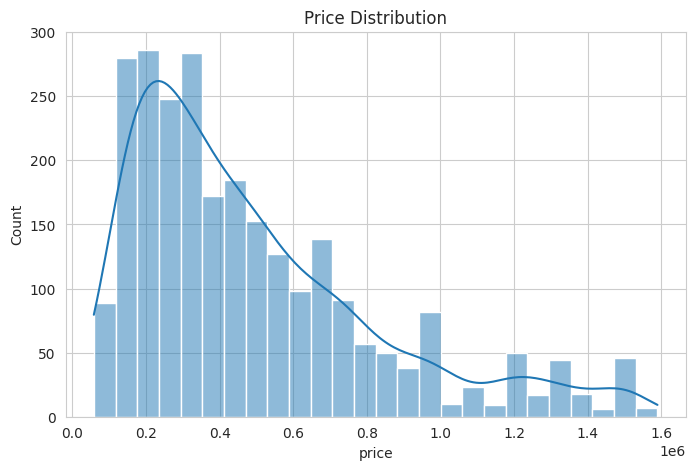

In [4]:
# ---- PRICE DISTRIBUTION ----
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

### Price Distribution

**Observations**
- The distribution is **right-skewed**, meaning most properties are concentrated at lower price ranges, while a smaller number of listings extend into much higher prices.
- The peak occurs roughly between **150,000–300,000**, indicating this is the most common price bracket.
- After around **600,000**, the number of listings drops noticeably, with only a few high-end properties reaching above **1M**.
- The KDE curve confirms a gradual decline and a long tail toward the expensive side.

**Interpretation**
- The market is dominated by **affordable to mid-range** properties.
- The presence of a long right tail suggests **outliers or luxury listings** that significantly exceed the majority price range.
- This skewness indicates that price normalization/transformation (e.g., log-scale) might be useful for modeling tasks.


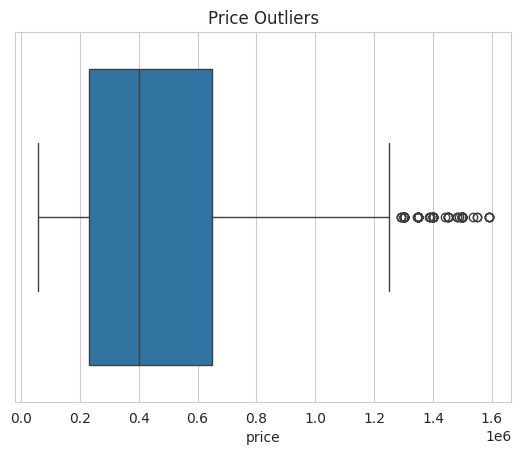

In [5]:
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

###  Price Outliers (Boxplot)

**Observations**
- The interquartile range (IQR) spans approximately from **~200,000 to ~650,000**, representing the core price range of most listings.
- The median price sits around **400,000**, indicating that half of the properties fall below this value.
- There are several **high-value outliers** extending from **1.2M up to ~1.6M**.
- No significant low-end outliers are observed — the dataset is more skewed on the expensive side.

**Interpretation**
- The market has a relatively stable mid-range distribution, but a noticeable group of **luxury or high-priced properties** drives the right skew seen in the histogram.
- These outliers may affect statistical modeling (e.g., regression) and should be evaluated for:
  - Potential removal,
  - Winsorization,
  - Or transformation (e.g., log-price).
- The presence of these high-end listings confirms heterogeneous property types (budget vs. luxury segments).


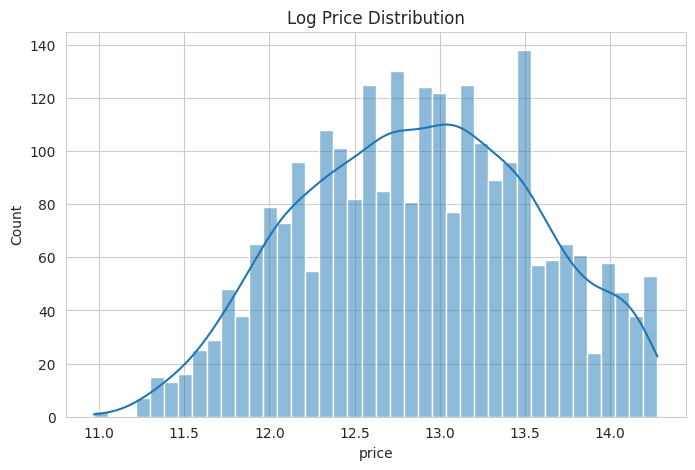

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), bins=40, kde=True)
plt.title("Log Price Distribution")
plt.show()

###  Log-Transformed Price Distribution

**Observations**
- After applying the log transformation, the distribution becomes much more **symmetrical** compared to the original right-skewed price distribution.
- The values cluster around **12.5–13.5**, forming a shape closer to a **normal distribution**.
- Extreme high-end prices that previously caused heavy skew are now compressed and no longer dominate the distribution.
- The KDE curve shows a smooth, bell-like pattern, indicating reduced variability and fewer extreme deviations.

**Interpretation**
- Log transformation successfully normalizes the price data, making it more suitable for:
  - **Regression models** (which often assume normally distributed errors),
  - **Statistical tests**,
  - And **visual comparisons**.
- This transformation reduces the influence of outliers and helps machine learning models learn more stable patterns.
- The near-normal shape suggests that modeling on log(price) will likely produce **better predictive performance** than using raw prices.


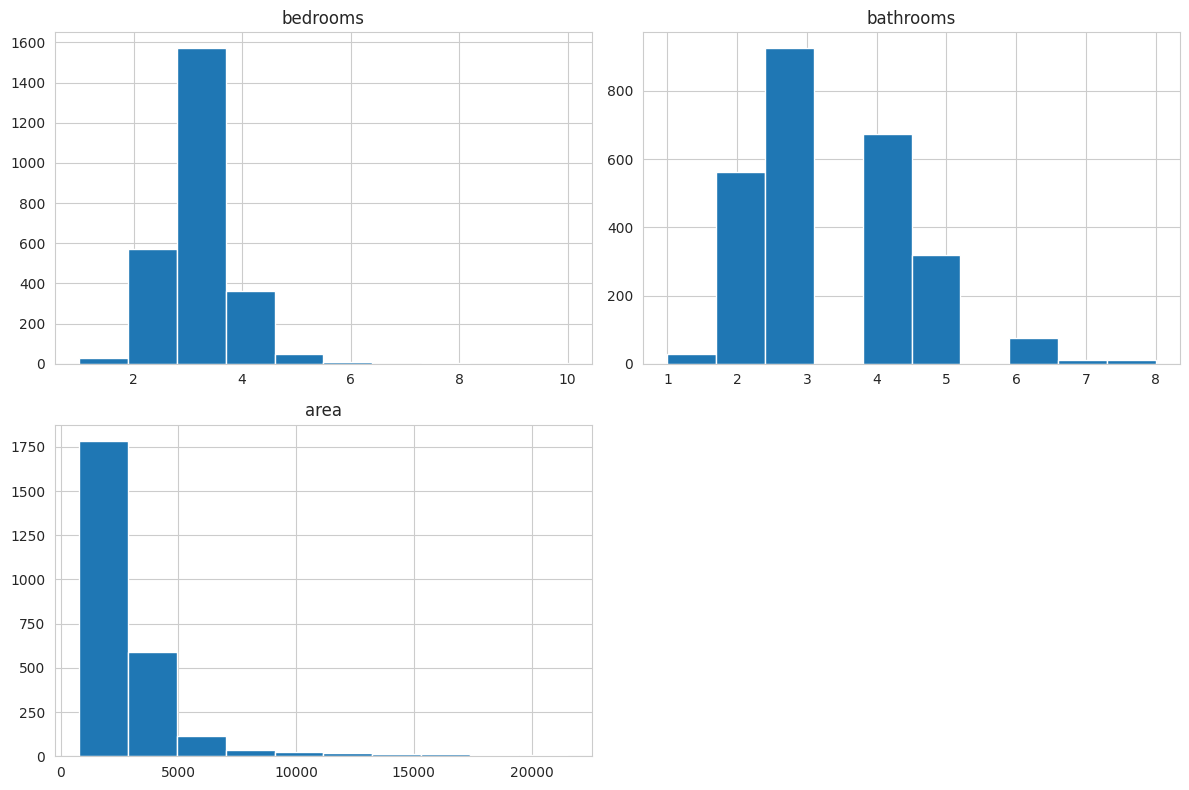

In [7]:
num_cols = ['bedrooms','bathrooms','area']

df[num_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()

###  Distribution of Bedrooms, Bathrooms, and Area

####  Bedrooms
**Observations**
- Most listings have **2–4 bedrooms**, with a strong concentration around **3 bedrooms**.
- Very few properties exceed **5 bedrooms**, indicating that large multi-room units are rare.
- The distribution is tight and well-centered, suggesting consistent property types in the dataset.

**Interpretation**
- The market appears dominated by **small to mid-sized residential units**, which aligns with typical urban housing supply.
- Outliers with unusually high bedroom counts may represent villas or large luxury homes.

---

####  Bathrooms
**Observations**
- Bathrooms mostly range between **2–4**, with 3 bathrooms being the most frequent.
- A small number of properties have **5+ bathrooms**, indicating luxury or multi-floor units.
- Similar to bedrooms, the distribution is fairly compact.

**Interpretation**
- Bathroom count is strongly correlated with bedroom count, showing a standard residential layout pattern.
- Listings with unusually high bathroom counts may need verification or special handling in modeling.

---

#### Area (sq ft / sqm)
**Observations**
- Area distribution is **highly right-skewed**, with most properties falling below **4000**, and a long tail reaching up to **20,000+**.
- A small number of very large properties dramatically increase the range.
- The majority of listings cluster in a compact lower range, showing heavy skew.

**Interpretation**
- The dataset contains a mix of **regular-sized apartments** and a few extremely large properties (likely villas, commercial buildings, or penthouses).
- These large-area outliers may distort statistical analysis or regression models unless transformed (e.g., log-area) or carefully treated.
- The skewed distribution suggests that modeling may benefit from normalization or binning for area-related features.



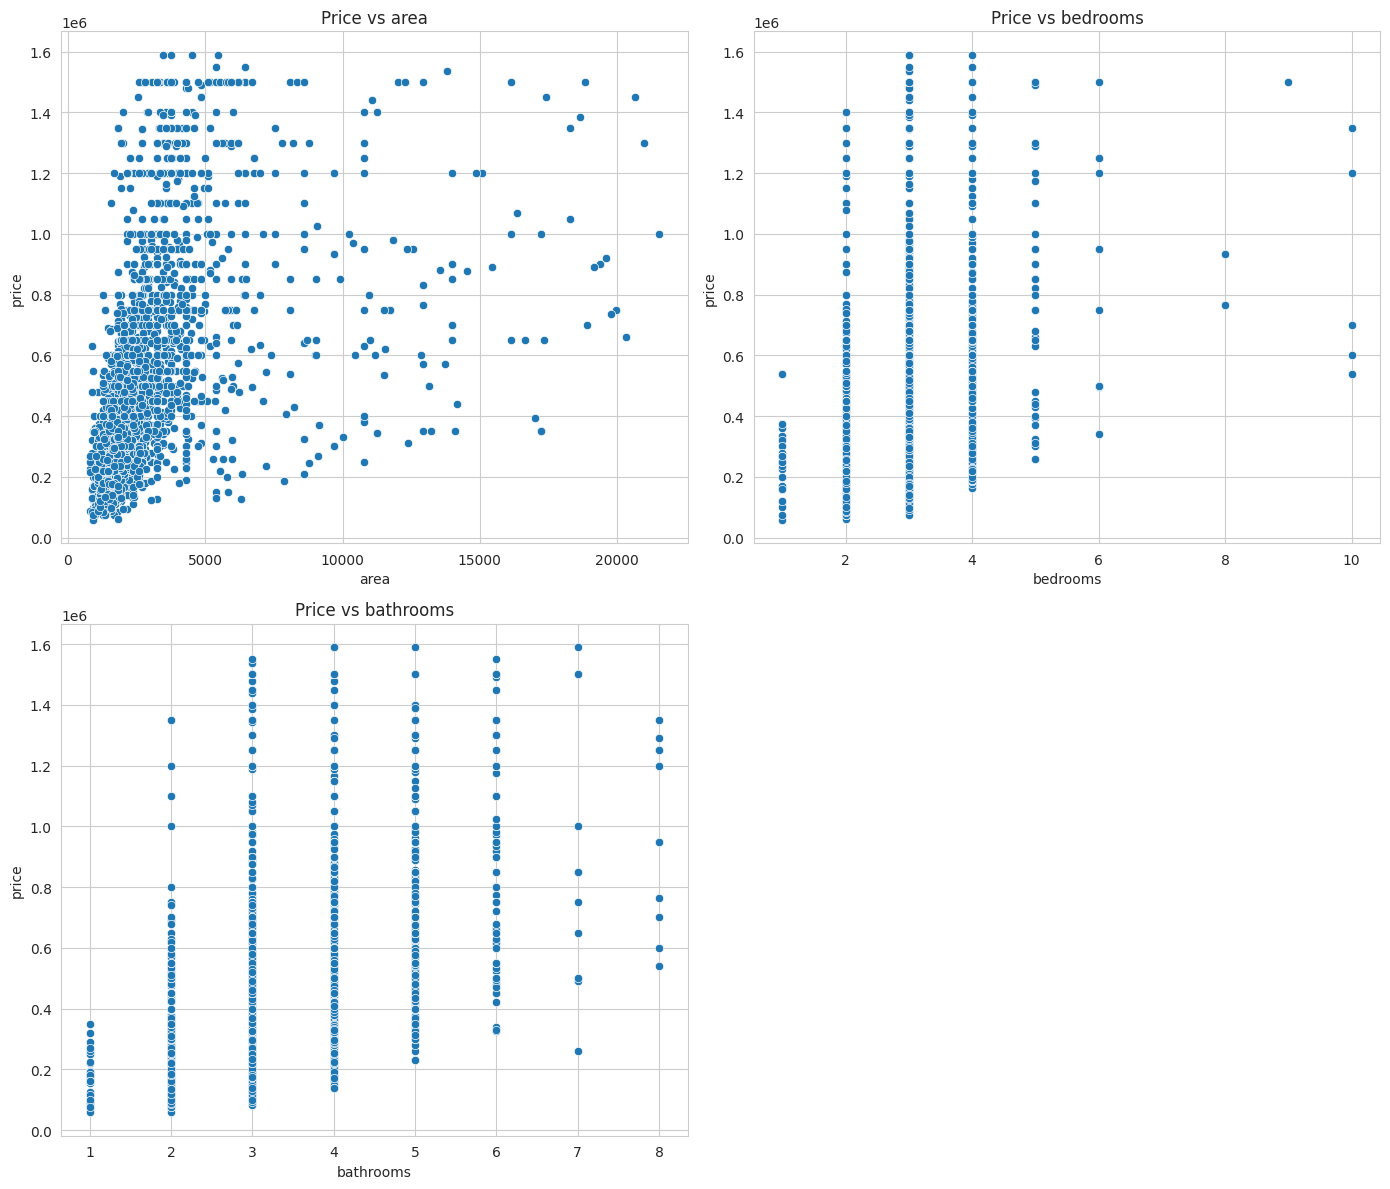

In [8]:
cols = ['area','bedrooms','bathrooms']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f"Price vs {col}")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Relationship Between Price and Numerical Features

---

##  Price vs Bathrooms

**Observations**
- There is a general upward trend: properties with **more bathrooms tend to have higher prices**, especially noticeable from 3–6 bathrooms.
- However, the spread is wide at each bathroom count, showing that bathroom count alone does not fully explain price differences.
- Extremely high-priced properties (1.2M–1.6M) appear across multiple bathroom counts, not only the highest ones.

**Interpretation**
- Bathroom count is a **weak-to-moderate indicator** of price: it correlates with price but lacks predictive precision on its own.
- Higher bathroom counts often correspond to larger units or villas, explaining why the upper range tends to increase.
- For modeling, bathrooms should be used alongside other features like **area, location, and bedrooms**.

---

## Price vs Area

**Observations**
- A clear positive trend is visible: **larger areas generally correspond to higher prices**.
- Most listings cluster below **5000 area units**, where price increases with area but with substantial variability.
- A few very large properties (10,000–20,000+) are extremely high priced, contributing to the dataset's skew.

**Interpretation**
- Area is likely one of the **strongest predictors** of property price in the dataset.
- The relationship is not perfectly linear — price growth slows at higher areas, suggesting diminishing returns.
- The spread indicates that price is also influenced by other factors like location and property type.
- A log transformation of area may improve model performance due to the long right tail.

---

## Price vs Bedrooms

**Observations**
- Similar to bathrooms, higher bedroom counts tend to be associated with higher prices, but with significant overlap.
- Most properties fall in the 2–4 bedroom range, where price varies widely.
- A few listings with extreme bedroom counts (8–10) are very high priced, though still showing variability.

**Interpretation**
- Bedrooms have a **positive but weak correlation** with price.
- This feature captures general size but lacks precision because:
  - Two properties with the same number of bedrooms may differ significantly in quality, area, or location.
- Bedrooms should be considered a **supporting variable**, not a primary predictor.

---

### Summary of Feature Relationships
- **Area shows the strongest relationship** with price.
- **Bathrooms and bedrooms** show weaker but still positive associations with price.
- High variance within each feature group indicates that **location, amenities, and property type** likely explain additional pricing differences.



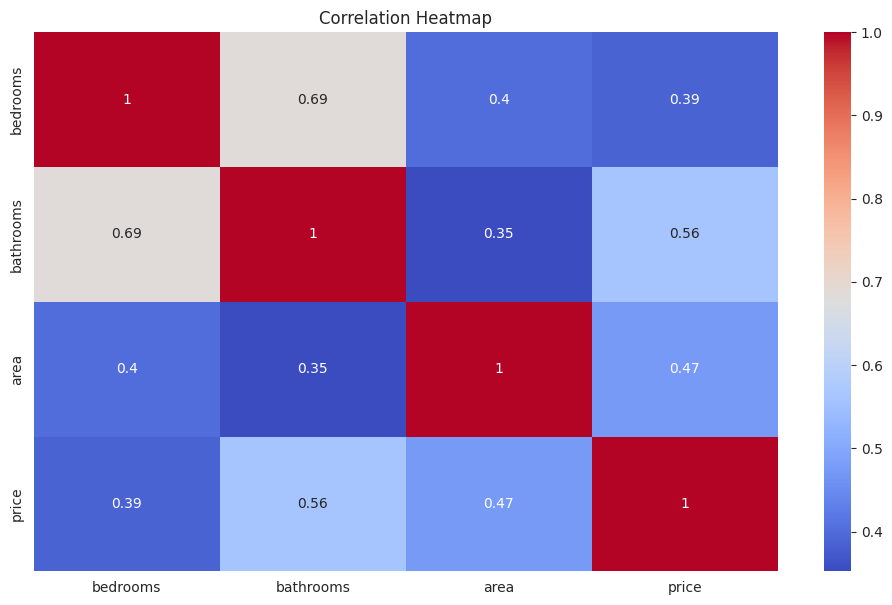

In [9]:
plt.figure(figsize=(12,7))

# Keep only numeric columns
valid_num_cols = [c for c in num_cols if pd.api.types.is_numeric_dtype(df[c])]

corr = df[valid_num_cols + ['price']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

###  Correlation Heatmap Analysis

**Observations**
- **Bathrooms (0.56)** show the strongest correlation with price among the three features.
- **Area (0.47)** also has a moderate positive correlation with price.
- **Bedrooms (0.39)** have the weakest correlation with price, though still positive.
- Bedrooms and bathrooms are strongly correlated with each other (**0.69**), which suggests overlap (multicollinearity).
- Area is only moderately correlated with bedrooms (**0.40**) and bathrooms (**0.35**), meaning area varies independently more than expected.

**Interpretation**
- Price is influenced by all three features, but **bathrooms and area** provide more predictive value than bedrooms.
- The high correlation between bedrooms and bathrooms suggests these features describe similar aspects of property size, and may introduce **multicollinearity** in regression models.
- The moderate correlation between area and price confirms that area is a key driver of value, but not the only factor—location and property type likely explain the remaining variance.
- Bedrooms’ relatively weak correlation implies that **room count alone does not capture the true size or quality differences** between properties.

**Takeaway for Modeling**
- Consider using **area and bathrooms** as stronger predictors.
- Bedrooms may still be useful but contributes less signal.
- If using linear models, be aware of multicollinearity between bedrooms and bathrooms (VIF check recommended).



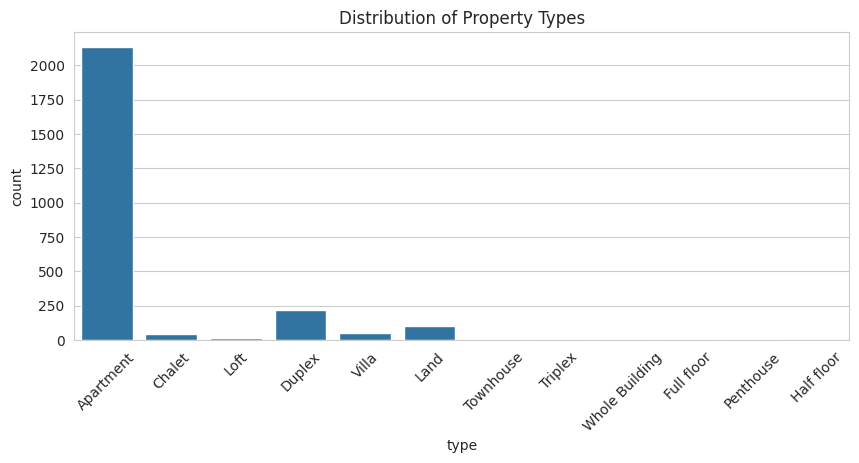

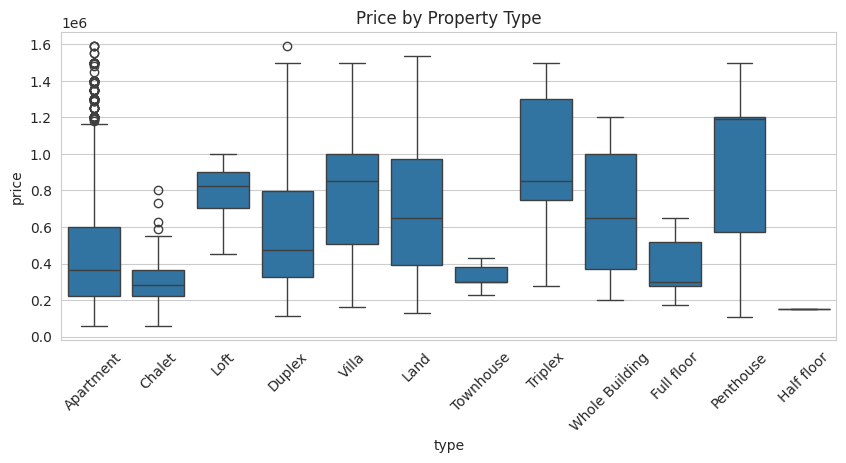

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['type'])
plt.xticks(rotation=45)
plt.title("Distribution of Property Types")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='type', y='price')
plt.xticks(rotation=45)
plt.title("Price by Property Type")
plt.show()

##  Distribution of Property Types & Price Comparison

---

#  Distribution of Property Types

**Observations**
- **Apartments dominate the dataset** with more than 2000 listings — by far the most common property type.
- Other categories such as **Duplex, Land, Villa, Chalet** appear but with much smaller counts.
- Rarer types like **Townhouse, Triplex, Whole Building, Penthouse, Half floor** are minimally represented.

**Interpretation**
- The dataset is heavily **apartment-centric**, meaning model results may be biased toward apartment pricing patterns.
- Property types with very few listings may be unreliable for statistical comparison or prediction due to insufficient sample size.
- If needed, you may consider:
  - Grouping rare types into broader categories,
  - Or using them cautiously in predictive modeling.

---

#  Price by Property Type (Boxplots)

**Observations**
- **Apartments** show a wide price range with many outliers but generally lower median prices than most other large-unit types.
- **Chalets and Townhouses** have relatively lower median prices and smaller spreads.
- **Lofts, Duplexes, Villas, and Land plots** show higher median prices and more variability.
- **Triplex and Penthouse** properties are among the highest-priced categories with wide interquartile ranges.
- **Whole buildings** also command high prices with considerable variation.
- The **Half floor** category has extremely few entries, making its distribution unreliable.

**Interpretation**
- Property type is a **strong differentiator** in price: larger and more premium categories (Triplex, Villa, Penthouse, Whole Building) naturally show higher valuation.
- Apartments, while numerous, span many quality levels, explaining the large number of outliers.
- Land prices vary significantly depending on plot size and location, leading to broad distribution.
- Categories with small sample sizes should not be overinterpreted — their price variations may not reflect true market behavior.

---

#  Takeaways
- Property type is one of the **most important categorical predictors** for price.
- The dataset is highly imbalanced (apartments dominate), so:
  - Consider **encoding strategies** (one-hot, frequency encoding),
  - Or balancing approaches if training a model sensitive to class distribution.
- Premium property categories naturally skew price distributions upward and should be incorporated carefully in modeling.



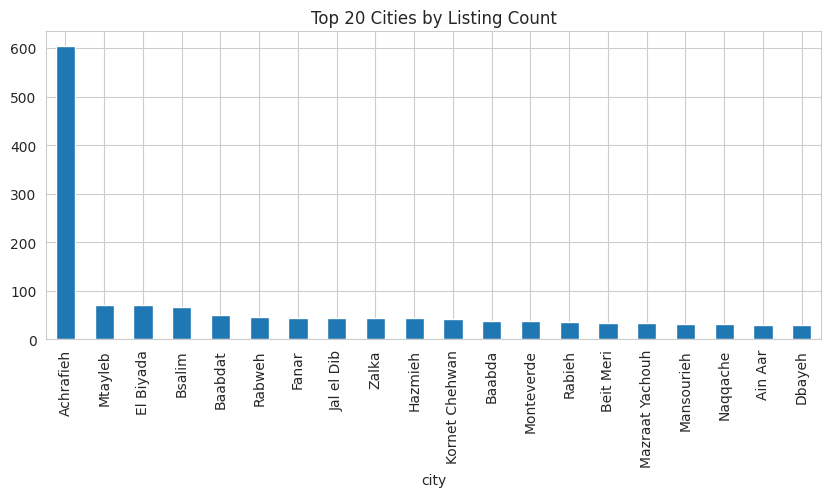

In [11]:
df['city'].value_counts().head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Cities by Listing Count")
plt.show()

##  Top 20 Cities by Listing Count

**Observations**
- **Achrafieh dominates heavily** with more than 600 listings — far more than any other city.
- The next group of cities (Meyzleb, El Biyada, Basillm, Baabdat, Rabweh) each have around **60–80 listings**.
- The remaining cities in the top 20 all fall between **30–60 listings**, showing a long tail of less frequently listed areas.
- The distribution is extremely **imbalanced**, with one city (Achrafieh) representing a disproportionately large portion of the dataset.

**Interpretation**
- Achrafieh is a major real estate hub in the dataset, possibly due to:
  - High population density,
  - More active real estate markets,
  - More apartments available for sale,
  - Or the data source focusing more on this area.
- Cities with lower listing counts may produce **less reliable statistics** and require grouping or smoothing during modeling.
- Location appears to be a **highly influential factor** in property availability and likely in pricing as well.

**Takeaway for Modeling**
- Because Achrafieh dominates, location-based models may learn patterns biased toward this city.
- Consider:
  - Encoding city using **target/frequency encoding** rather than one-hot encoding,
  - Grouping rare cities into an “Other” category,
  - Investigating whether high-count cities differ significantly in price distribution.



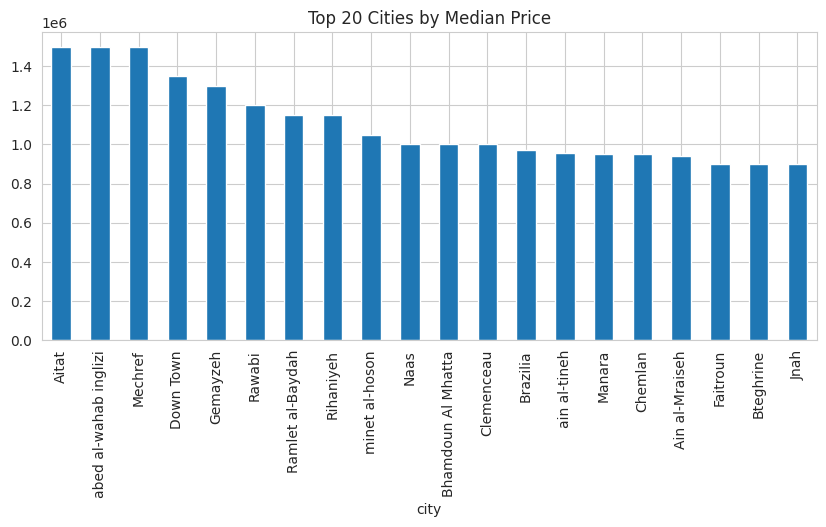

In [12]:
city_price = df.groupby('city')['price'].median().sort_values(ascending=False)
city_price.head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Cities by Median Price")
plt.show()

##  Top 20 Cities by Median Property Price

**Observations**
- The highest median prices are found in **Aitat, abed al-wahab, Ingiliz, and Mechref**, all exceeding **1.4M**.
- Other high-price areas include **Down Town, Gemayzeh, Rihaniyeh, Rmeilat el-Bayda**, with medians between **1.1M–1.3M**.
- The lower end of the top 20 (e.g., **Btermine, Bteghrine, Jnah**) shows medians around **850k–950k**.
- There is a relatively smooth downward trend — no sharp jumps — indicating a consistent tiering of high-value regions.
- Some high-median cities may have fewer listings, meaning their values can be influenced by small sample size.

**Interpretation**
- This ranking highlights **premium real estate zones**, many of which are known luxury or high-demand residential areas.
- These cities likely have:
  - Higher land value,
  - Newer or luxury developments,
  - Larger property sizes,
  - Or better infrastructure and amenities.
- The difference between the top and bottom of the top-20 list is substantial (approx. **500k** difference in median prices), suggesting strong geographical segmentation in the housing market.

**Takeaway for Modeling**
- **City is a major driver of price** and must be included as a key categorical feature.
- For regression models:
  - Consider **target encoding** or **frequency encoding**,
  - Account for cities with few listings (their median may not be stable).
- This chart confirms that **location-based pricing variation** is very strong and likely more important than physical features like bedrooms or bathrooms.



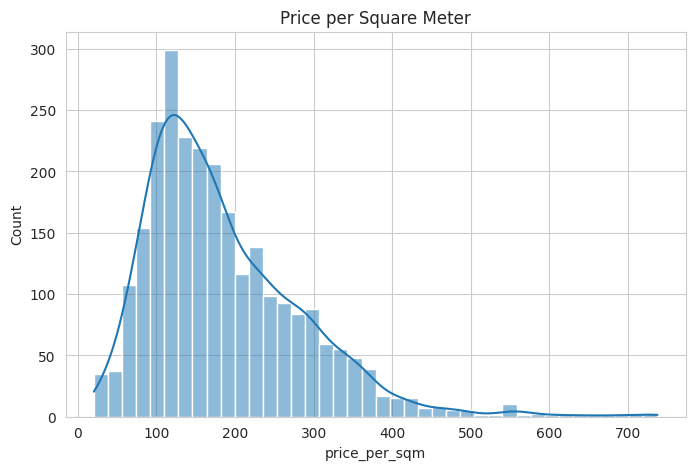

In [13]:
df['price_per_sqm'] = df['price'] / df['area']

plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqm'], bins=40, kde=True)
plt.title("Price per Square Meter")
plt.show()

## 📐 Distribution of Price per Square Meter (price_per_sqm)

**Observations**
- The distribution is **right-skewed**, with most properties priced between **100–200 per sqm**.
- A strong peak occurs around **130–150 per sqm**, representing the most common market value.
- The distribution gradually decreases beyond **250 per sqm**, with very few listings priced above **400–700 per sqm**.
- Extreme high values (500–700+) are rare and likely represent **luxury projects or exceptional locations**.

**Interpretation**
- Price per sqm provides a **normalized measure of property value**, independent of property size.
- The right-skew indicates a market where the majority of listings fall into moderately priced categories, while a small fraction commands premium rates.
- This metric is particularly useful for:
  - Comparing properties across cities,
  - Detecting overpriced or underpriced listings,
  - Building regression models that need size-adjusted pricing.

**Takeaway for Modeling**
- Price per sqm can serve as:
  - A feature for predicting total price,
  - A target for separate models aimed at estimating **fair valuation**,
  - A reference for outlier detection (extremely high or low sqm prices).
- A transformation (e.g., log-sqm-price) may help stabilize variance and improve model performance.



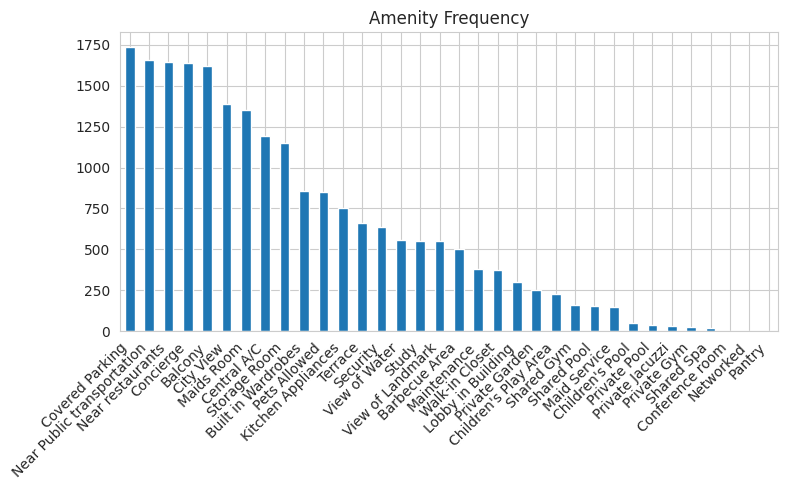

In [14]:
from collections import Counter
import ast

# ---- AMENITIES ----
if "amenities" in df.columns:
    all_amen = Counter()

    for a in df["amenities"].fillna("[]"):
        try:
            # safely parse list-like strings
            items = ast.literal_eval(a) if isinstance(a, str) else a
            if isinstance(items, list):
                all_amen.update(items)
        except:
            continue

    amen_series = pd.Series(all_amen).sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    amen_series.plot(kind="bar")
    plt.title("Amenity Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##  Amenity Frequency Analysis

**Observations**
- The most common amenities include:
  - **0 (missing/no amenities listed)**
  - **Covered Parking**
  - **Near Public Transportation**
  - **Cable TV**, **Concierge**, **Balcony**, **Maid’s Room**
- These top amenities appear in over **1200–1700 listings**, indicating they are standard expectations in many properties.
- Mid-frequency amenities (500–900 occurrences) include:
  - **AC Units**, **Storage Rooms**, **Built-in Appliances**, **View features**, **Terrace**
- Low-frequency amenities (<200 occurrences) include premium or specialized features such as:
  - **Private Pool**, **Shared Pool**, **Gym**, **Children’s Area**, **Conference Room**, **Pantry**
- A significant number of listings have **no amenity information (0 category)**, which may represent missing data rather than actual lack of amenities.

**Interpretation**
- The high frequency of basic amenities indicates that they are commonly available and may not strongly differentiate property prices.
- Premium amenities, while less common, may significantly influence price when present because they reflect luxury or high-end units.
- The presence of the “0” category as the most frequent value highlights a data quality issue — amenities may not always be recorded, reducing the feature’s reliability.

**Takeaway for Modeling**
- Consider:
  - Treating “0” as **missing data**, not an actual amenity.
  - One-hot encoding or frequency encoding for amenity categories.
  - Creating **amenity count features** (e.g., total_amenities).
  - Focusing on rare but high-impact amenities (Pool, Gym, View, Private Parking) as potential price drivers.

- Amenity distribution confirms that amenities add value but vary widely in frequency, so they should be incorporated thoughtfully into predictive models.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


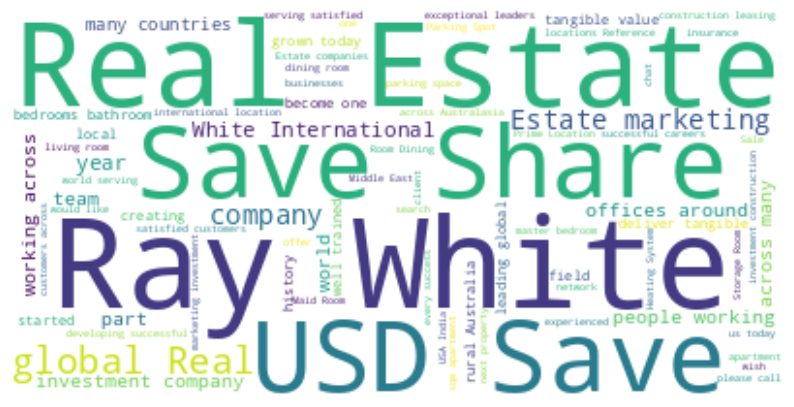

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['description'].fillna("").astype(str).values)
wc = WordCloud(background_color="white", stopwords=set(stopwords.words("english"))).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##  Word Cloud of Property Descriptions

**Observations**
- The most dominant words in the property descriptions include:
  - **“Ray White”**, **“Real Estate”**, **“USD”**, **“Save”**, **“Share”**
- These words indicate that a large portion of the description text is influenced by **branding, marketing copy, or template-like promotional content** rather than detailed property-specific information.
- Common real estate marketing terms such as **“global,” “investment,” “company,” “marketing,” “working,” “estate,” “team”** appear frequently.
- Very few purely descriptive words related to actual property features (e.g., bedrooms, area, amenities) appear prominently, suggesting they are either:
  - Less frequent, or
  - Overshadowed by repeated boilerplate text.

**Interpretation**
- Property descriptions in the dataset seem to contain a lot of **advertising or corporate text** rather than detailed listing descriptions.  
- This limits the usefulness of raw text for modeling unless further cleaning is applied.
- The repetition of “Ray White” suggests many listings come from the same agency or share a standard text template.

**Takeaway for Modeling**
- Text preprocessing is essential. Consider the following:
  - Removing agency names (e.g., “Ray White”)  
  - Filtering out marketing boilerplate  
  - Focusing only on words describing **property features**, **location**, **amenities**, or **condition**
- For NLP tasks (TF-IDF or embeddings), removing noisy repeated words will improve signal quality and reduce bias.

**Next Steps**
- Apply more advanced text cleaning:
  - Custom stopwords (e.g., “Real Estate”, “Ray White”, “Save”, “Share”, “USD”)  
  - Removing promotional sentences  
  - Using n-grams to capture meaningful phrases like “sea view,” “spacious living,” “central heating,” etc.



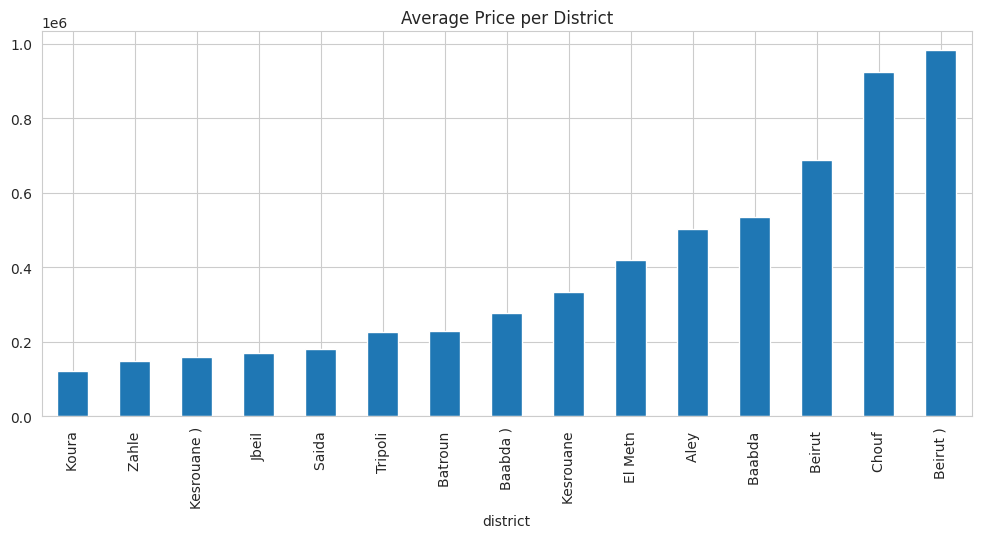

In [16]:

    plt.figure(figsize=(12,5))
    df.groupby("district")["price"].mean().sort_values().plot(kind="bar")
    plt.title("Average Price per District")
    plt.show()

##  Average Property Price per District

**Observations**
- There is a clear upward trend in average property prices across districts, starting from **Koura** (~120k) and reaching up to **Beirut** (~1M).
- The **lowest-priced districts** include:
  - Koura  
  - Zahle  
  - Kesrouane (first entry)  
  - Jbeil  
  - Saida  
- Mid-range districts with averages between **200k–400k** include:
  - Tripoli  
  - Batroun  
  - Baabda (first entry)  
  - Kesrouane (second entry)  
  - El Metn  
- **High-priced districts** include:
  - Aley (~450k)  
  - Baabda (second entry, ~650k)  
  - Beirut (~700k)  
  - Chouf (~900k)  
  - Beirut (again, ~1M — possibly from a different data group or duplicated name formatting)

**Interpretation**
- District-level location plays a significant role in property pricing, with **Beirut and Chouf dominating the high-end market**.
- Prices in Lebanon show strong geographic segmentation:
  - **Urban and highly developed districts** (Beirut, Baabda, Metn) attract premium prices.
  - **More rural or less densely populated districts** (Koura, Zahle, Jbeil) tend to have much lower averages.
- The variation between the lowest and highest average district prices exceeds **800,000**, highlighting substantial location-based inequality in the real estate market.

**Data Quality Note**
- Some district names appear duplicated or inconsistently formatted:
  - “Kesrouane” appears twice  
  - “Baabda” appears twice  
  - “Beirut” appears twice (with different parentheses)  
  This may indicate inconsistent text formatting in the dataset.

**Takeaway for Modeling**
- District should be considered a **key categorical feature**, possibly more predictive than city.
- Consider:
  - **Standardizing district names** before modeling,
  - Using **target encoding** for district,
  - Evaluating district influence alongside city-level granularity.



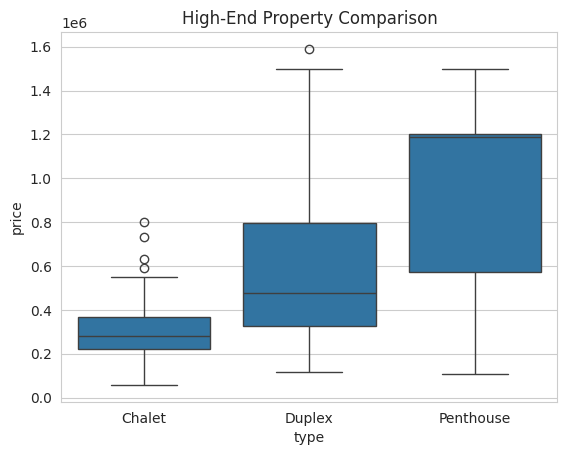

In [17]:

    special_types = df[df["type"].isin(["Penthouse","Duplex","Chalet"])]
    if not special_types.empty:
        sns.boxplot(data=special_types, x="type", y="price")
        plt.title("High-End Property Comparison")
        plt.show()

##  High-End Property Type Comparison (Chalet vs Duplex vs Penthouse)

**Observations**
- **Chalets** show the lowest price range among the three types, with most listings between **200k–400k** and a few outliers reaching **~600k**.
- **Duplexes** exhibit a much wider spread, with prices ranging from **~150k up to ~1.5M**.  
  - Median price is around **450k–500k**.  
  - The upper whisker and outliers indicate the presence of luxury duplex units.
- **Penthouses** have the highest median price of the group, approximately **1.1M**.
  - The price range is large, spanning **~150k to ~1.5M**, but skewed strongly upward.
  - The large IQR reflects high variability, likely due to differences in size, location, and luxury level.

**Interpretation**
- This comparison highlights clear price segmentation among high-end property types:
  - **Chalets** are generally entry-level high-end units.
  - **Duplexes** occupy a middle tier with significant variability — from modest to luxury offerings.
  - **Penthouses** consistently represent the top-tier luxury segment, with the highest median and upper range.
- The strong variation within duplexes and penthouses suggests that **size, condition, district, and view** play major roles in pricing beyond the basic property type.

**Takeaway for Modeling**
- Property type alone is not sufficient to predict price but provides valuable segmentation.
- For luxury-focused analytics:
  - Including **area**, **district**, and **amenities** will greatly improve price estimation.
- The clear upward trend among these three types supports the idea that **type is a strong categorical signal** for identifying high-value listings.

